In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [59]:
# Iris dataset is one of the built in datasets of sklearn library, and we are using that here.
iris_df = pd.read_csv('datasets/iris/iris.data', skiprows=1,
                     names= ['sepal-length',
                            'sepal-width',
                            'petal-length',
                            'petal-width',
                            'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [60]:
# let's randomize the data
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.6,2.5,3.9,1.1,Iris-versicolor
1,4.4,2.9,1.4,0.2,Iris-setosa
2,5.1,2.5,3.0,1.1,Iris-versicolor
3,6.9,3.1,5.1,2.3,Iris-virginica
4,7.1,3.0,5.9,2.1,Iris-virginica


In [61]:
iris_df.shape

(149, 5)

In [62]:
iris_df['class'].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [63]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class']).astype(str)

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.6,2.5,3.9,1.1,1
1,4.4,2.9,1.4,0.2,0
2,5.1,2.5,3.0,1.1,1
3,6.9,3.1,5.1,2.3,2
4,7.1,3.0,5.9,2.1,2


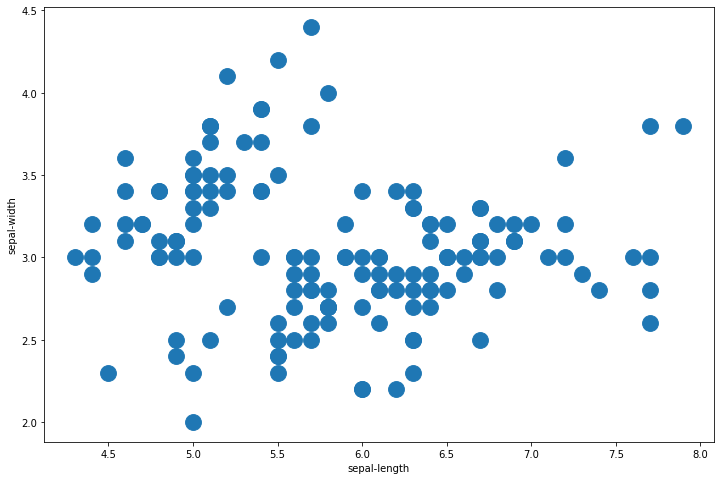

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

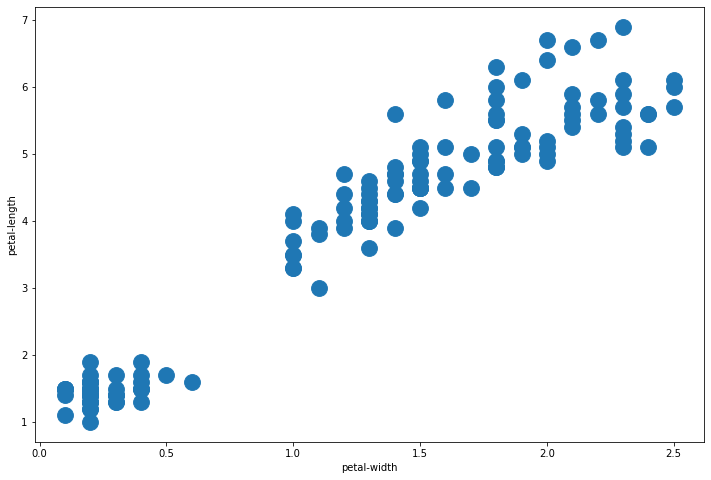

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)

plt.xlabel('petal-width')
plt.ylabel('petal-length')

plt.show()

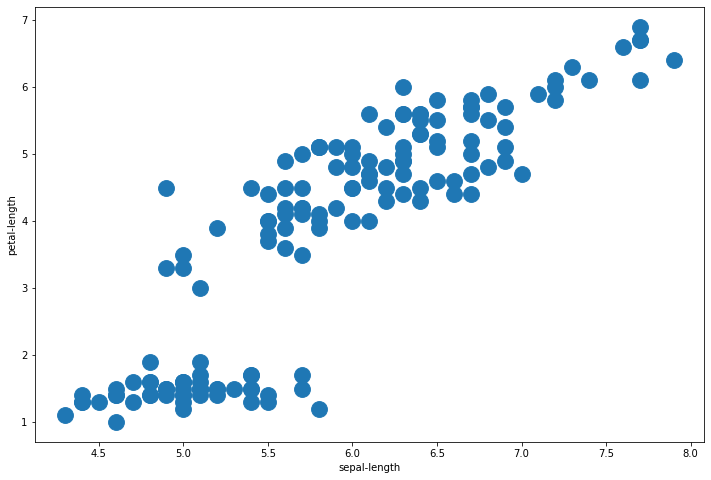

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

In [67]:
# in the above graph, you can see some clusters forming. You can identify about 3 here

iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

# First here, we are considering 2 features to perform clustering, then we can proceed to include the rest

,sepal-length,petal-length
120,4.9,1.4
25,5.1,1.6
22,5.7,4.5
123,6.8,5.5
36,5.0,1.2


In [68]:
iris_2D.shape

(149, 2)

In [69]:
# Now before applying the KMeans estimator on this data, we are converting it to a numpy array. Why?

iris_2D = np.array(iris_2D)

In [70]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

# In the real world datasets, you may not know the number of clusters initially, that's when you'll use
# techniques like Hyper-parameter tuning

In [71]:
kmeans_model_2D.labels_

array([2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [72]:
# The labels assigned by K-means may not match the actual labels in our data - these labels just represent clusters

centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.006     , 1.496     ],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

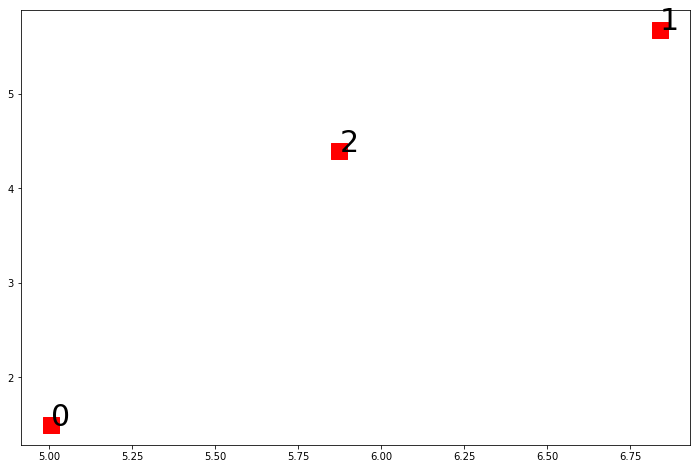

In [73]:
# The above are coordinates of the cluster centers

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')


for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [74]:
iris_labels = iris_df['class']

In [75]:
print('Homogeneity_score: ', metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print('Completeness_score: ', metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print('v_measure_score: ', metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_))

print('Silhouette_score: ', metrics.silhouette_score(iris_labels, kmeans_model_2D.labels_))

Homogeneity_score:  0.7014365278306043
Completeness_score:  0.7077571624221454
v_measure_score:  0.7045826702042487
Adjusted_rand_score:  0.6949972011546609
Adjusted_mutual_info_score:  0.7008411611629515


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 2. 2. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 1. 2. 1. 1. 2. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 2. 1. 0. 0. 0. 0. 2. 0. 2. 1. 1. 2. 0. 0. 2. 1. 2.
 1. 2. 0. 0. 2. 1. 1. 2. 2. 1. 0. 0. 2. 0. 0. 2. 1. 0. 0. 0. 2. 2. 1. 2.
 1. 1. 2. 0. 2. 0. 1. 1. 0. 1. 0. 2. 2. 1. 2. 1. 1. 0. 0. 2. 0. 2. 1. 0.
 1. 1. 2. 2. 0. 2. 2. 0. 1. 2. 2. 1. 2. 0. 2. 2. 1. 2. 0. 0. 2. 0. 2. 0.
 0. 1. 1. 2. 0. 2. 1. 1. 0. 2. 0. 1. 2. 0. 2. 1. 1. 1. 2. 1. 1. 1. 2. 0.
 1. 0. 2. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.